## <center>1st Kaggle competition : digit recognizer</center>

In [398]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [399]:
data = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [400]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [401]:
data.isnull().any().sum()

0

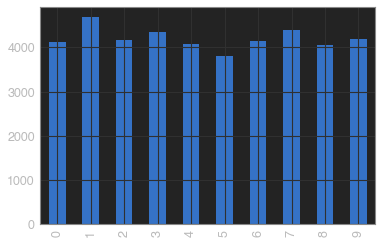

In [402]:
data.label.value_counts().sort_index().plot(kind='bar')

In [403]:
train_data=(data.drop(columns='label')).values
labeled_data=(data.label).values
train_data0 = train_data.reshape(train_data.shape[0], 28, 28)

<function matplotlib.pyplot.show(*args, **kw)>

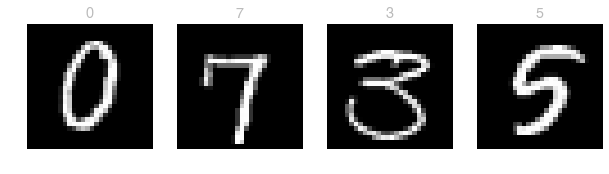

In [404]:
plt.figure(figsize=(13,13))
for i in range(5, 9):
    plt.subplot(450 + (i+1))
    plt.imshow(train_data0[i], cmap=plt.get_cmap('gray'))
    plt.title(labeled_data[i])
    plt.axis('off')
plt.show

In [405]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns='label'), data.label, test_size=0.2, random_state=2)

In [407]:
rfc  = RandomForestClassifier(n_estimators = 300)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
accuracy_score(y_test, rfc_pred)

0.9647619047619047

In [ ]:
test